- Here i'm going to make a model which is going to  predict an image is belongs to Normal or Cataract category!

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import os
for dirname, _, filenames in os.walk("C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\yogesh\AppData\Local\Temp\ipykernel_44348\518505899.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\data.xlsx
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1000_left.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1000_right.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1001_left.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1001_right.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1002_left.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1002_right.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1003_left.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1003_right.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1004_left.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1004_right.jpg
C:/Users/yogesh/Downloads/archive (2)/ODIR-5K/ODIR-5K\Testing Images\1007_left.jpg
C:/Users/yogesh/Do

In [2]:
df = pd.read_csv(r"C:\Users\yogesh\Downloads\archive (2)\full_df.csv")
df.head(3)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg


> <h3> Extracting Cataract & Normal information from the Dataset </h3>

In [3]:
def has_cataract(text):
    if "cataract" in text:
        return 1
    else:
        return 0

In [4]:
df["left_cataract"] = df["Left-Diagnostic Keywords"].apply(lambda x: has_cataract(x))
df["right_cataract"] = df["Right-Diagnostic Keywords"].apply(lambda x: has_cataract(x))

In [5]:
left_cataract = df.loc[(df.C ==1) & (df.left_cataract == 1)]["Left-Fundus"].values
left_cataract[:15]

array(['0_left.jpg', '81_left.jpg', '103_left.jpg', '119_left.jpg',
       '254_left.jpg', '294_left.jpg', '330_left.jpg', '448_left.jpg',
       '465_left.jpg', '477_left.jpg', '553_left.jpg', '560_left.jpg',
       '594_left.jpg', '611_left.jpg', '625_left.jpg'], dtype=object)

In [6]:
right_cataract = df.loc[(df.C ==1) & (df.right_cataract == 1)]["Right-Fundus"].values
right_cataract[:15]

array(['24_right.jpg', '81_right.jpg', '112_right.jpg', '188_right.jpg',
       '218_right.jpg', '345_right.jpg', '354_right.jpg', '477_right.jpg',
       '553_right.jpg', '560_right.jpg', '625_right.jpg', '726_right.jpg',
       '769_right.jpg', '949_right.jpg', '955_right.jpg'], dtype=object)

In [7]:
print("Number of images in left cataract: {}".format(len(left_cataract)))
print("Number of images in right cataract: {}".format(len(right_cataract)))

Number of images in left cataract: 304
Number of images in right cataract: 290


>Normal Images

In [8]:
left_normal = df.loc[(df.C ==0) & (df["Left-Diagnostic Keywords"] == "normal fundus")]["Left-Fundus"].sample(250,random_state=42).values
right_normal = df.loc[(df.C ==0) & (df["Right-Diagnostic Keywords"] == "normal fundus")]["Right-Fundus"].sample(250,random_state=42).values
right_normal[:15]

array(['2964_right.jpg', '680_right.jpg', '500_right.jpg',
       '2368_right.jpg', '2820_right.jpg', '2769_right.jpg',
       '2696_right.jpg', '2890_right.jpg', '940_right.jpg',
       '2553_right.jpg', '3371_right.jpg', '3042_right.jpg',
       '919_right.jpg', '3427_right.jpg', '379_right.jpg'], dtype=object)

In [9]:
cataract = np.concatenate((left_cataract,right_cataract),axis=0)
normal = np.concatenate((left_normal,right_normal),axis=0)

In [10]:
print(len(cataract),len(normal))

594 500


><h3>Creating Dataset from images</h3>

In [11]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
dataset_dir = "/kaggle/input/ocular-disease-recognition-odir5k/preprocessed_images/"
image_size=224
labels = []
dataset = []
def create_dataset(image_category,label):
    for img in tqdm(image_category):
        image_path = os.path.join(dataset_dir,img)
        try:
            image = cv2.imread(image_path,cv2.IMREAD_COLOR)
            image = cv2.resize(image,(image_size,image_size))
        except:
            continue
        
        dataset.append([np.array(image),np.array(label)])
    random.shuffle(dataset)
    return dataset
        

In [12]:
dataset = create_dataset(cataract,1)

100%|██████████| 594/594 [00:04<00:00, 122.31it/s]


In [14]:
len(dataset)

588

In [15]:
dataset = create_dataset(normal,0)

100%|██████████| 500/500 [00:05<00:00, 91.81it/s]


In [16]:
len(dataset)

1088

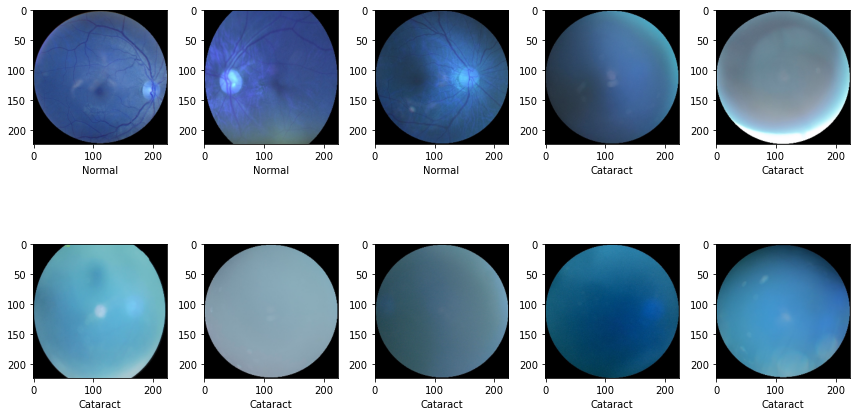

In [17]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(dataset)))
    image = dataset[sample][0]
    category = dataset[sample][1]
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel(label)
plt.tight_layout()    

><h3>Dividing dataset into x(features) & y(target)</h3>

In [18]:
x = np.array([i[0] for i in dataset]).reshape(-1,image_size,image_size,3)
y = np.array([i[1] for i in dataset])

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

><h3>Creating Model</h3>

In [20]:
from tensorflow.keras.applications.vgg19 import VGG19
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

80142336/80134624 [==============================] - 1s 0us/step


In [21]:
for layer in vgg.layers:
    layer.trainable = False

In [22]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25089     
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [24]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
checkpoint = ModelCheckpoint("vgg19.h5",monitor="val_acc",verbose=1,save_best_only=True,
                             save_weights_only=False,period=1)
earlystop = EarlyStopping(monitor="val_acc",patience=5,verbose=1)

In [26]:
history = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
28/28 [==============================] - 3s 125ms/step - loss: 1.5057 - accuracy: 0.8885 - val_loss: 0.8850 - val_accuracy: 0.9358
Epoch 2/15
28/28 [==============================] - 2s 85ms/step - loss: 0.6187 - accuracy: 0.9437 - val_loss: 0.3660 - val_accuracy: 0.9679
Epoch 3/15
28/28 [==============================] - 2s 85ms/step - loss: 0.3199 - accuracy: 0.9621 - val_loss: 0.0505 - val_accuracy: 0.9817
Epoch 4/15
28/28 [==============================] - 2s 85ms/step - loss: 0.0849 - accuracy: 0.9885 - val_loss: 0.1635 - val_accuracy: 0.9771
Epoch 5/15
28/28 [==============================] - 2s 85ms/step - loss: 0.0141 - accuracy: 0.9943 - val_loss: 0.1328 - val_accuracy: 0.9862
Epoch 6/15
28/28 [==============================] - 2s 84ms/step - loss: 0.0022 - accuracy: 0.9989 - val_loss: 0.1196 - val_accuracy: 0.9908
Epoch 7/15
28/28 [==============================] - 2s 85ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1793 - val_accuracy: 0.9862
Epoch 8/15
2

In [27]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 0s 60ms/step - loss: 0.1682 - accuracy: 0.9862
loss: 0.16819606721401215
Accuracy: 0.9862385392189026


In [57]:
from tensorflow.keras.applications import InceptionV3

In [58]:
InceptionV3 = InceptionV3(weights="imagenet",include_top = False,input_shape=(image_size,image_size,3))

In [59]:
for layer in InceptionV3.layers:
    layer.trainable = False

In [60]:
model1 = Sequential()
model1.add(InceptionV3.input)
model1.add(vgg)
model1.add(Flatten())
model1.add(Dense(1,activation="sigmoid"))

In [61]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25089     
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [62]:
model1.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [63]:
history = model1.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),
                    verbose=1,callbacks=[checkpoint,earlystop])

Epoch 1/15
28/28 [==============================] - 3s 92ms/step - loss: 1.7127 - accuracy: 0.8805 - val_loss: 0.5220 - val_accuracy: 0.9266
Epoch 2/15
28/28 [==============================] - 2s 84ms/step - loss: 0.3011 - accuracy: 0.9632 - val_loss: 0.0785 - val_accuracy: 0.9817
Epoch 3/15
28/28 [==============================] - 2s 85ms/step - loss: 0.0676 - accuracy: 0.9862 - val_loss: 0.2360 - val_accuracy: 0.9725
Epoch 4/15
28/28 [==============================] - 2s 84ms/step - loss: 0.0233 - accuracy: 0.9874 - val_loss: 0.1264 - val_accuracy: 0.9862
Epoch 5/15
28/28 [==============================] - 2s 84ms/step - loss: 0.0117 - accuracy: 0.9943 - val_loss: 0.1285 - val_accuracy: 0.9862
Epoch 6/15
28/28 [==============================] - 2s 84ms/step - loss: 0.0060 - accuracy: 0.9966 - val_loss: 0.1486 - val_accuracy: 0.9908
Epoch 7/15
28/28 [==============================] - 2s 84ms/step - loss: 2.9265e-04 - accuracy: 1.0000 - val_loss: 0.1855 - val_accuracy: 0.9908
Epoch 8/1

In [64]:
loss,accuracy = model1.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

7/7 [==============================] - 0s 61ms/step - loss: 0.1743 - accuracy: 0.9908
loss: 0.17428529262542725
Accuracy: 0.9908257126808167


In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model1.predict_classes(x_test)

In [66]:
accuracy_score(y_test,y_pred)

0.9908256880733946

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       100
           1       0.98      1.00      0.99       118

    accuracy                           0.99       218
   macro avg       0.99      0.99      0.99       218
weighted avg       0.99      0.99      0.99       218



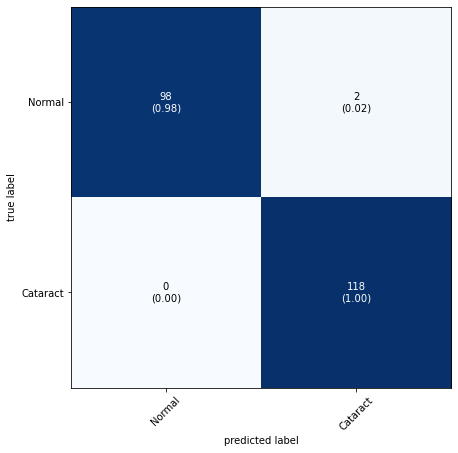

In [68]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),class_names = ["Normal","Cataract"],
                      show_normed = True);

><h3>Learning Curve</h3>

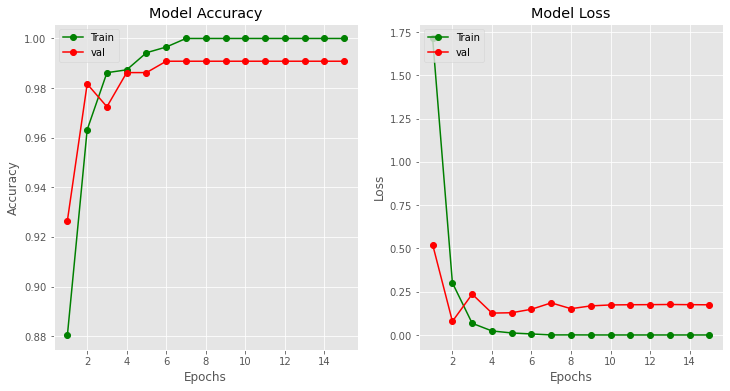

In [69]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(12,6))
epochs = range(1,16)
plt.subplot(1,2,1)
plt.plot(epochs,history.history["accuracy"],"go-")
plt.plot(epochs,history.history["val_accuracy"],"ro-")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","val"],loc = "upper left")

plt.subplot(1,2,2)
plt.plot(epochs,history.history["loss"],"go-")
plt.plot(epochs,history.history["val_loss"],"ro-")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","val"],loc = "upper left")
plt.show()

><h3>Prediction:</h3>

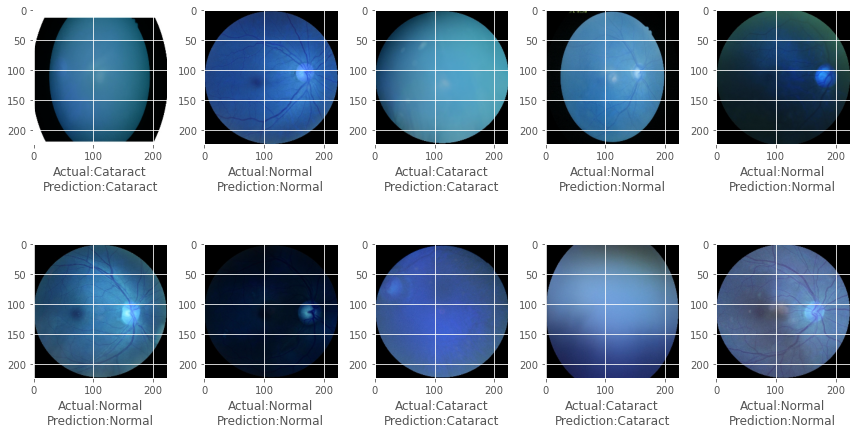

In [70]:
plt.figure(figsize=(12,7))
for i in range(10):
    sample = random.choice(range(len(x_test)))
    image = x_test[sample]
    category = y_test[sample]
    pred_category = y_pred[sample]
    
    if category== 0:
        label = "Normal"
    else:
        label = "Cataract"
        
    if pred_category== 0:
        pred_label = "Normal"
    else:
        pred_label = "Cataract"
        
    plt.subplot(2,5,i+1)
    plt.imshow(image)
    plt.xlabel("Actual:{}\nPrediction:{}".format(label,pred_label))
plt.tight_layout() 